In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [2]:
agri = pd.read_csv('climate_change_impact_on_agriculture_2024.csv')

In [8]:
agri.head().sort_values('Year',ascending=False)

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


I want to see how collinear features are. So I will look at a correlation matrix.

In [37]:
# Calculate the correlation matrix
corr_matrix = agri.corr()

/var/folders/v1/ymptnwwx3x1b7_mw0nns09wr0000gn/T/ipykernel_52618/3720898098.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = agri.corr()


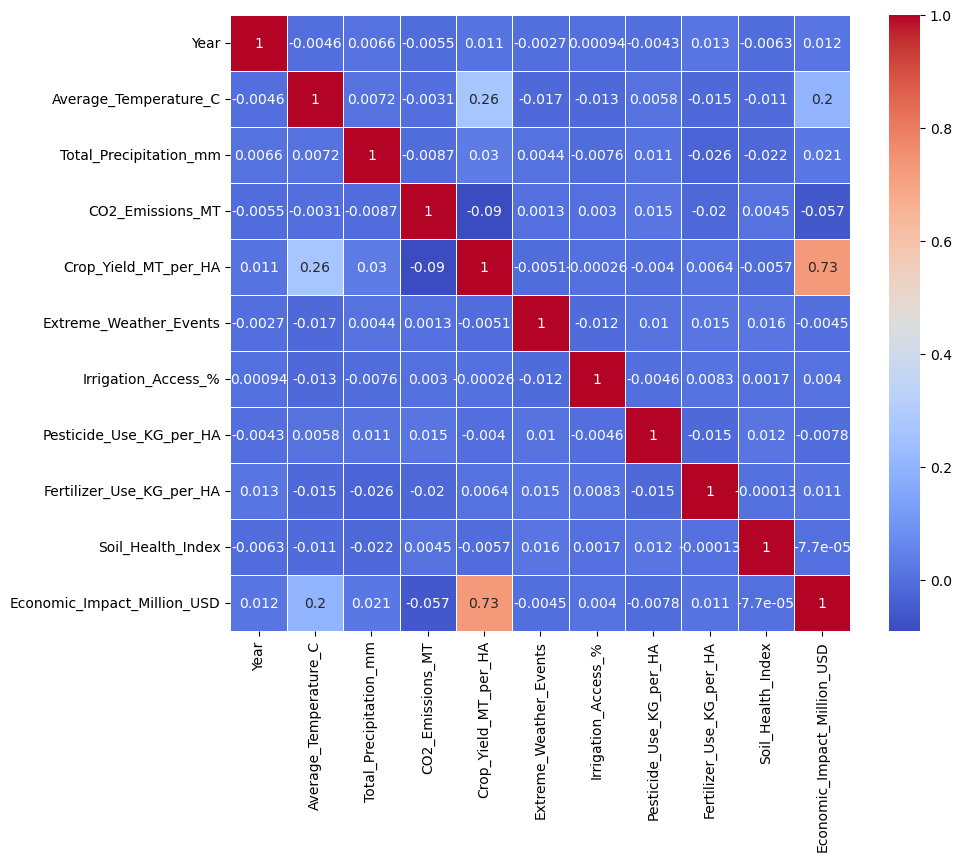

In [42]:
# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [88]:
agri_converted = pd.get_dummies(agri, columns=['Country', 'Region', 'Crop_Type','Adaptation_Strategies'], drop_first=True)

In [89]:
# Step 1: Standardize the features (optional but recommended)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(agri_converted)

In [93]:
# Step 2: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
pca_result = pca.fit_transform(scaled_data)

In [94]:
# Step 3: Create a DataFrame with the PCA components
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

In [96]:
# Step 4: Check explained variance ratio
print(pca.explained_variance_ratio_)  # Variance explained by each component
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2f}")

[0.0336006  0.03351177 0.03347081 0.03341548 0.03223345 0.03153036
 0.02920574 0.02633731 0.02014593 0.01991058 0.01977186 0.01812387
 0.01806217 0.0180083  0.01791412 0.01780801 0.01770315 0.01761768
 0.01749143 0.01723559 0.01691754 0.01677753 0.01674681 0.01660601
 0.01651533 0.01641446 0.01633448 0.01625185 0.01620547 0.01614983
 0.0161047  0.01606505 0.01604174 0.0160168  0.01598628 0.01598134
 0.01592138 0.01586022 0.01582208 0.01575915 0.0157284  0.01560248
 0.0154768  0.01545149 0.01532851 0.01524101 0.01503347 0.01487886
 0.01485767 0.0147276  0.01453087]
Total variance explained: 0.96


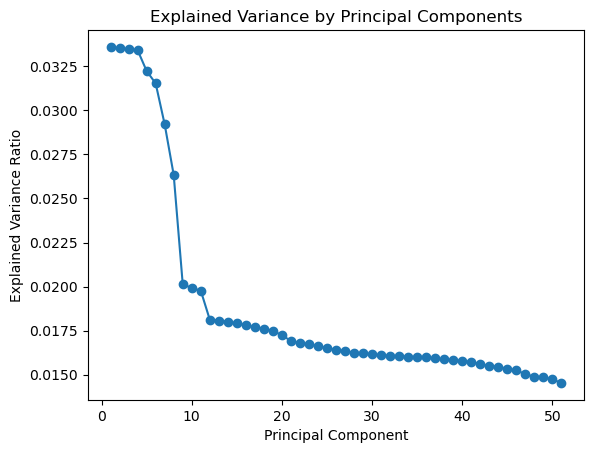

In [98]:
# Step 5: Optionally, visualize the explained variance
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

In [ ]:
# Predict
y_pred = rf.predict(X_test)

Using this synthetic crop data, I would like to build a predictive regression model while at the same time finding feature importance. Due to the structure of the data and the features involved, I expect that many of the features will show multi-collinearity. 

L2 model didn't perform very well, so I'll try random forest regression. It could be that the data is not very linear.

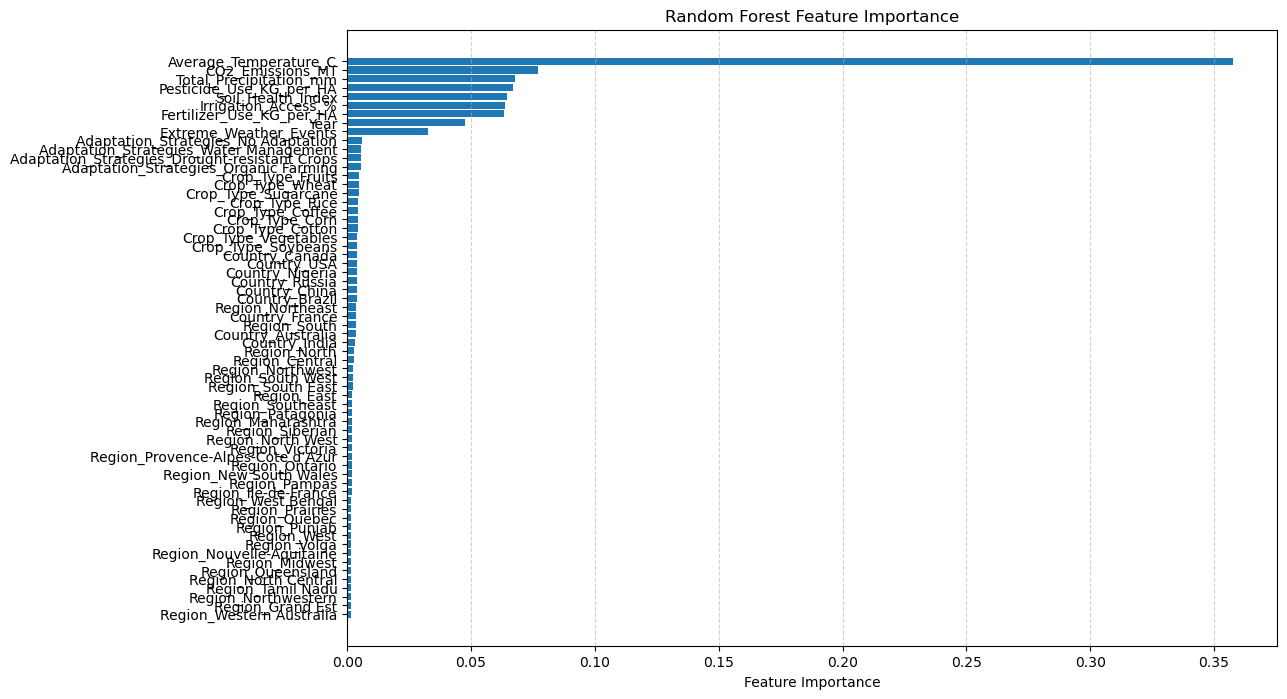

In [68]:
# Get feature importance
importances = rf_model.feature_importances_

# Sort the features by importance
sorted_idx = importances.argsort()

# Set figure size to add more space
plt.figure(figsize=(12, 8))

plt.barh(X.columns[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
# Add a grid
plt.grid(True, axis='x', linestyle='--', alpha=0.6)  # Grid only for x-axis
plt.show()